In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
pd.options.display.max_rows=100

In [4]:
path = '/home/neeraj/Projects/Heart_Failure'
heart = pd.read_csv(path + "/data/heart_failure_clinical_records_dataset.csv")

In [5]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.This method deals with only numeric columns. To look for categorical variables as well use include="all".

count - tells count of the columns or tells number of non empty rows
mean - mean of the column
std - standard deviation of the column
min - minimum value of the column
25% - 25th percentile/quarter that is median of first and second quarter of numbers
50% - median of numbers
75% - 75th percentile/quarter that is median of third and fourth quarter
max - maximum value of the column

In [7]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [27]:
continuous_columns = ['creatinine_phosphokinase','ejection_fraction',
                       'platelets','serum_creatinine','serum_sodium','time']

In [8]:
# Check for null values. Dataset does not has any null values.
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

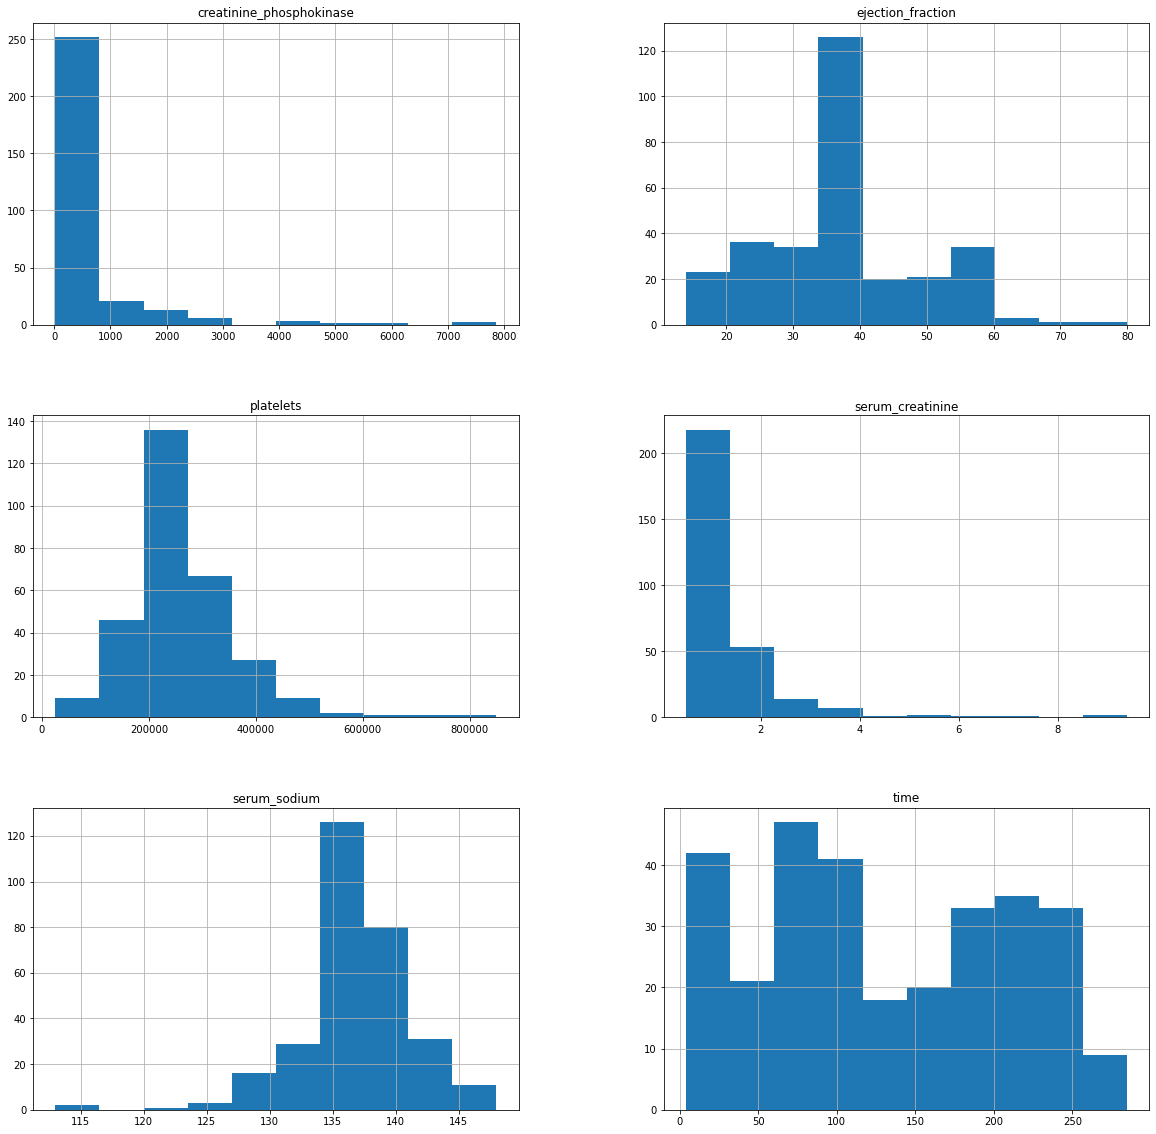

In [28]:
p=heart[continuous_columns].hist(figsize = (20,20))

We can see skewness for few columns. More about skewness can be read from:

https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

<AxesSubplot:xlabel='variable', ylabel='value'>

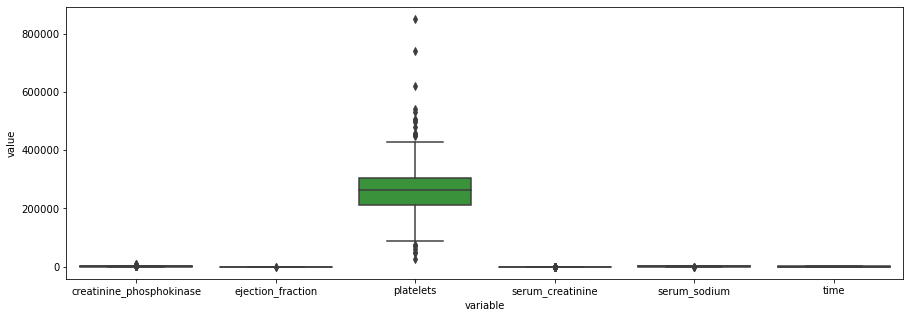

In [79]:
# Finding outliers
# Using sns boxplot
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='value', data=pd.melt(heart[continuous_columns]))

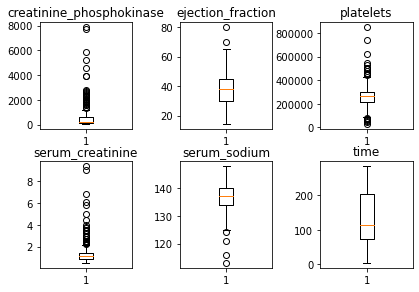

<Figure size 1440x720 with 0 Axes>

In [76]:
fig, ax = plt.subplots(nrows = 2, ncols = 3)
fig.tight_layout()
plt.figure(figsize=(20,10))
i=0
for row in range(0,2):
    for col in range(0,3):
        ax[row,col].boxplot(heart[continuous_columns[i]])
        ax[row,col].set_title(continuous_columns[i])
        i = i+1
plt.show()

In [22]:
heart['log_creatinine_phosphokinase'] = np.log(heart['creatinine_phosphokinase'])

<AxesSubplot:>

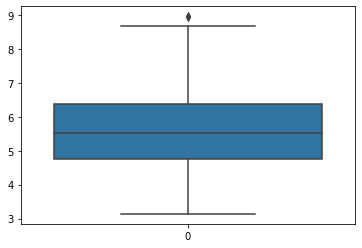

In [36]:
sns.boxplot(data=heart['log_creatinine_phosphokinase'])

<AxesSubplot:>

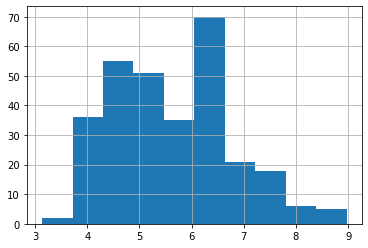

In [24]:
heart['log_creatinine_phosphokinase'].hist()

In [80]:
# Check for outliers 
# Outliers are the values which are 3 standard deviations away from mean

z = np.abs(stats.zscore(heart[continuous_columns]))

In [85]:
z.shape

(299, 6)

In [4]:
heart.shape

(299, 13)

In [57]:
heart.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

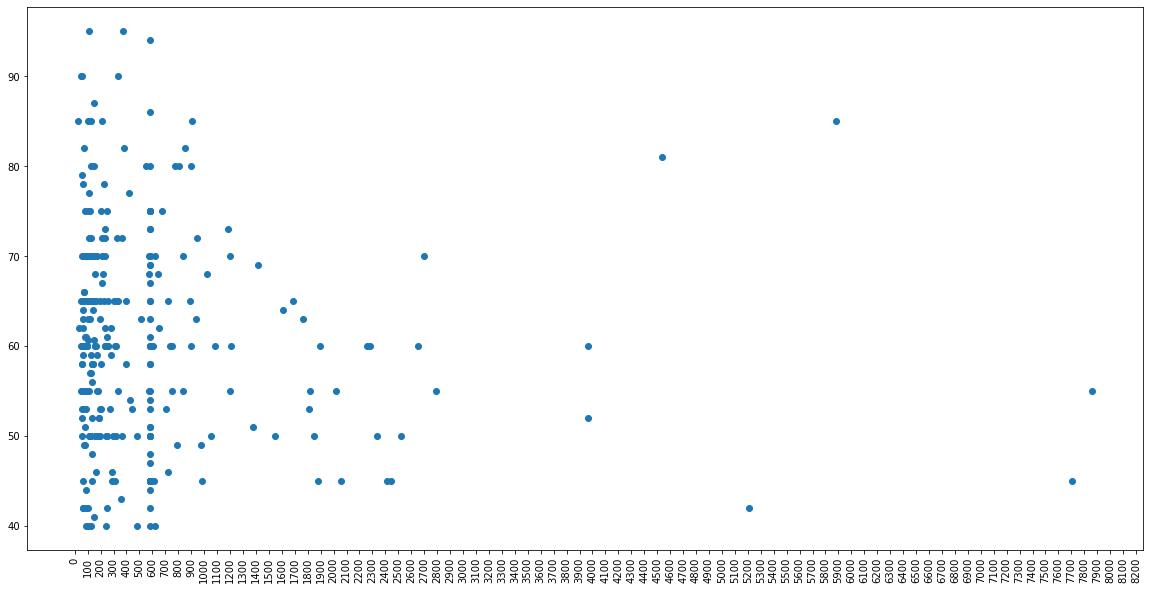

In [56]:
x_ticks=np.arange(0,9000,100)
plt.figure(figsize=(20, 10))
plt.xticks(x_ticks, rotation=90)
plt.scatter('creatinine_phosphokinase','age', data=heart)

(array([252.,  21.,  13.,   6.,   0.,   3.,   1.,   1.,   0.,   2.]),
 array([  23. ,  806.8, 1590.6, 2374.4, 3158.2, 3942. , 4725.8, 5509.6,
        6293.4, 7077.2, 7861. ]),
 <BarContainer object of 10 artists>)

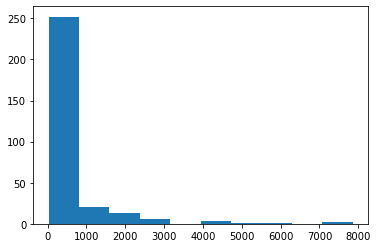

In [79]:
#'serum_creatinine','platelets'
plt.hist( 'creatinine_phosphokinase', data=heart)

In [36]:
heart[heart.creatinine_phosphokinase==7861]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [38]:
heart.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [45]:
heart[heart.creatinine_phosphokinase>=600].shape

(63, 13)

In [53]:
# Normal range of CPK is in between 20-200. This is a enzyme that catalyzes the reaction of 
# creatine and adenosine triphosphate (ATP) to phosphocreatine and adenosine diphosphate (ADP)
# Mainly available in cardiac, skeletal muscles. If these muscles are damaged then this enzyme leaks in 
# blood stream. Thus. CPK is indication of muscles damage.
heart[(heart.creatinine_phosphokinase>=200)&(heart.DEATH_EVENT==1)].shape

(56, 13)

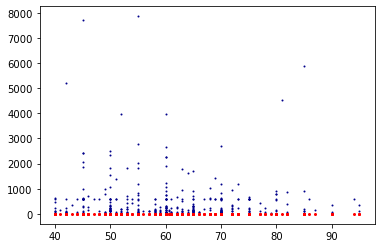

In [68]:
plt.scatter( 'age', 'creatinine_phosphokinase', data=heart, color='darkblue',s=1)
plt.scatter('age', 'serum_creatinine', data=heart, color='red', s=4)

## Let's analyse serum cratinine 
Source - https://pubmed.ncbi.nlm.nih.gov/9056611/
Elevated serum creatinine has been associated with increased mortality in hypertensive persons, the elderly, and patients with myocardial infarction or stroke in whom cardiovascular disease is the major cause of death. We have examined the relationship between serum creatinine concentration and the risk of major ischemic heart disease and stroke events and all-cause mortality in a general population of middle-aged men. 

(array([218.,  53.,  14.,   7.,   1.,   2.,   1.,   1.,   0.,   2.]),
 array([0.5 , 1.39, 2.28, 3.17, 4.06, 4.95, 5.84, 6.73, 7.62, 8.51, 9.4 ]),
 <BarContainer object of 10 artists>)

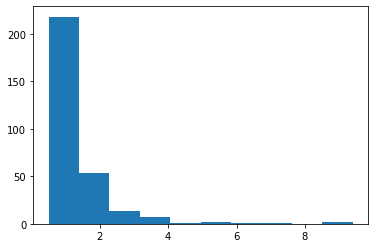

In [78]:
plt.hist('serum_creatinine', data=heart)

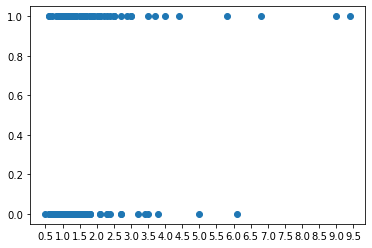

In [87]:
x_ticks=np.arange(0,10,0.5)
plt.xticks(x_ticks)
plt.scatter('serum_creatinine','DEATH_EVENT',data=heart)

In [92]:
heart[(heart.DEATH_EVENT==1) & (heart.serum_creatinine >=1.3) & (heart.high_blood_pressure==1)].shape

(22, 13)